In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['MEDV'] = boston.target
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [7]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are no NULL values in the data. Our target feature is MEDV.

In [8]:
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

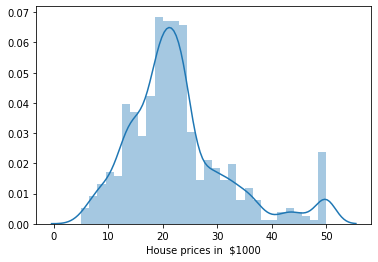

In [9]:
sns.distplot(bos['MEDV'], bins=30)
plt.xlabel("House prices in  $1000")
plt.show()

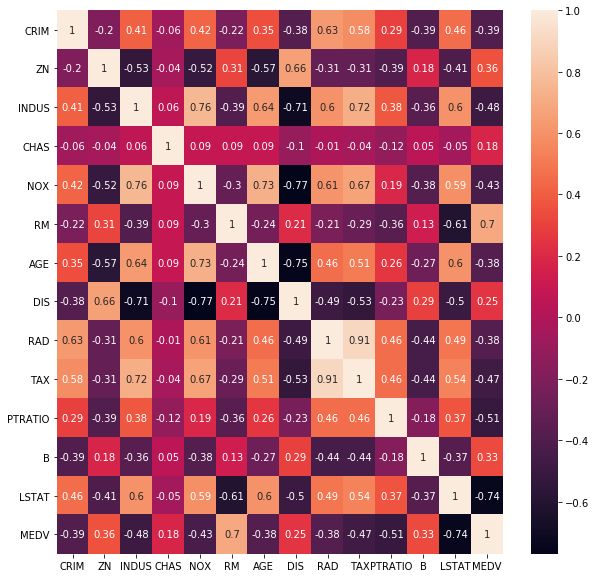

In [10]:
correlation_matrix = bos.corr().round(2)
# annot = True to print the values inside the square
plt.subplots(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True)

RM and LSAT have a strong correlation with MEDV.

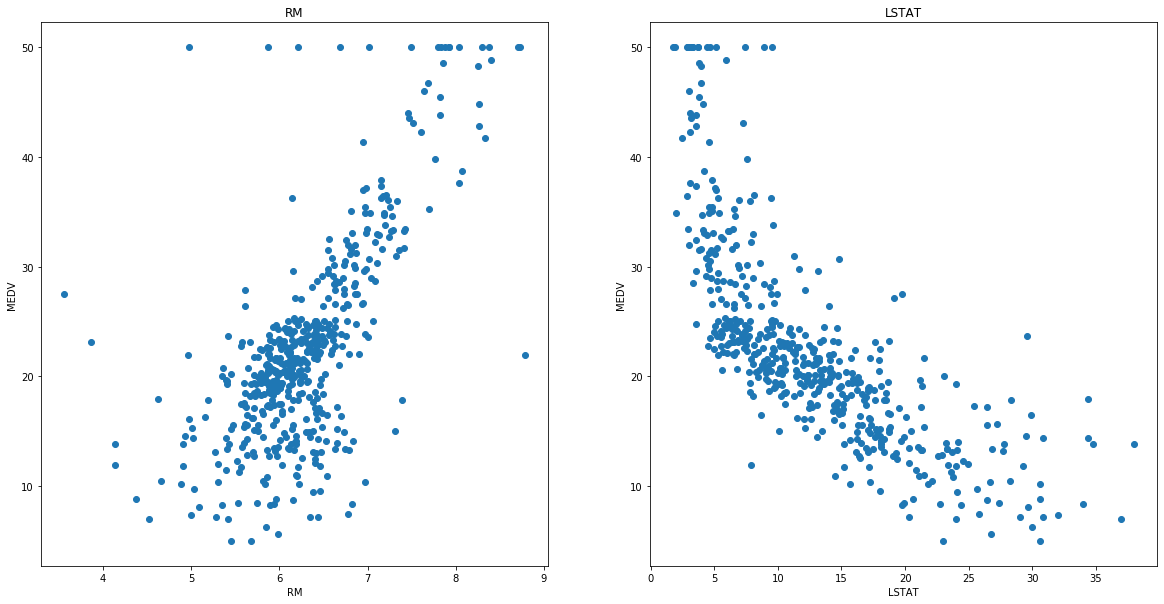

In [23]:
plt.figure(figsize = (20,10))
col = ['RM', 'LSTAT']
target = bos['MEDV']

for i, j in enumerate(col):
    plt.subplot(1, len(col) , i+1)
    x = bos[j]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(j)
    plt.xlabel(j)
    plt.ylabel('MEDV')

RM looks like a linear relationship, but we need to transfrom LSTAT as it currently appears to have a non-linear fit

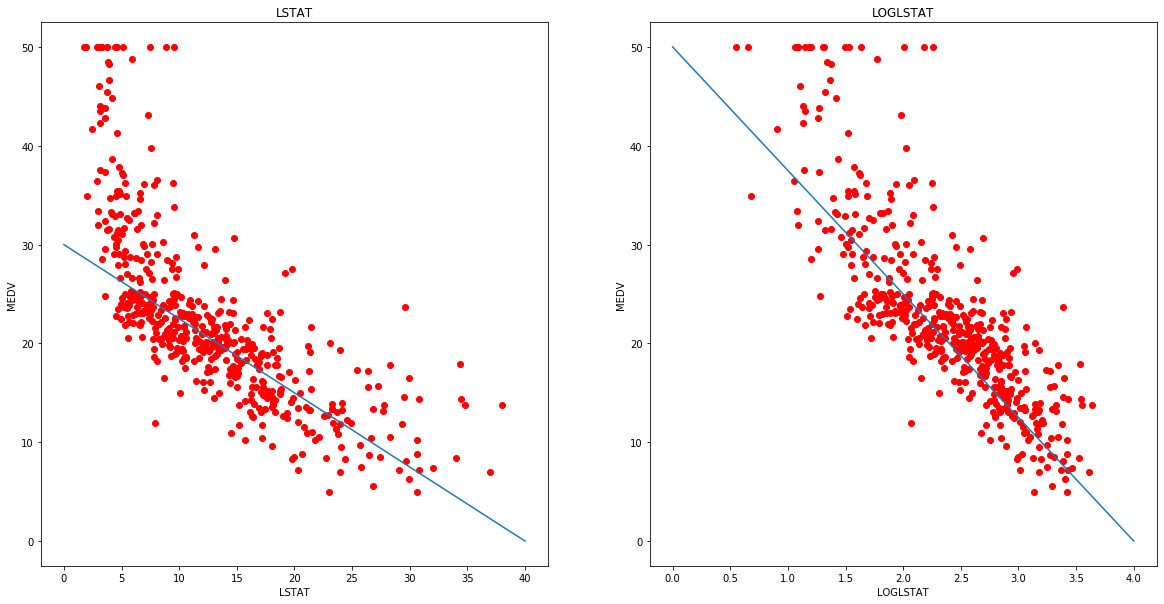

In [37]:
plt.figure(figsize = (20,10))
bos['LOGLSTAT']=bos['LSTAT'].apply(np.log)

col = ['LSTAT', 'LOGLSTAT']
target = bos['MEDV']

for i, j in enumerate(col):
    plt.subplot(1, len(col) , i+1)
    x = bos[j]
    y = target
    plt.scatter(x, y, marker='o', color='red')
    plt.title(j)
    plt.xlabel(j)
    plt.ylabel('MEDV')
    if j=='LSTAT':
        plt.plot([0,40],[30,0])
    else:
        plt.plot([0,4],[50,0])

In [32]:
X=bos[['RM','LSTAT']]
Y=bos.MEDV
print(X.shape)
print(Y.shape)

(506, 2)
(506,)


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr=LinearRegression()

def test_model(count, X, Y):
    r2_avg=0
    rmse_avg=0
    for i in range(count):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
        lr.fit(X_train, Y_train)
        pred = lr.predict(X_test)
        
        #evaluate
        r2 = lr.score(X_test, Y_test)
        rmse = (np.sqrt(mean_squared_error(Y_test, pred)))
        print('r-squared: {}'.format(r2))
        print('root mean squared error: {}'.format(rmse))
        print('---------------------------------------')
        r2_avg += r2
        rmse_avg += rmse
        
    print('average r-squared: {}'.format(r2_avg/count))
    print('average root mean squared error: {}'.format(rmse_avg/count))

In [80]:
test_model(10, X, Y)

r-squared: 0.6304737066823556
root mean squared error: 6.016310933847597
---------------------------------------
r-squared: 0.6032086759874649
root mean squared error: 6.1466249368091805
---------------------------------------
r-squared: 0.6058661067971054
root mean squared error: 5.372982104405314
---------------------------------------
r-squared: 0.59996315074668
root mean squared error: 5.881791794693376
---------------------------------------
r-squared: 0.6663184097504551
root mean squared error: 5.389654740657867
---------------------------------------
r-squared: 0.6825844373453267
root mean squared error: 5.4170096857586385
---------------------------------------
r-squared: 0.5574818225123936
root mean squared error: 5.456458701119665
---------------------------------------
r-squared: 0.6483103450596902
root mean squared error: 5.639714625984572
---------------------------------------
r-squared: 0.6120050754353217
root mean squared error: 6.106654480273435
-----------------------

In [ ]:
The r-squared value shows how strong our features determined the target value. 
The rmse defines the difference between predicted and the test values. 

Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

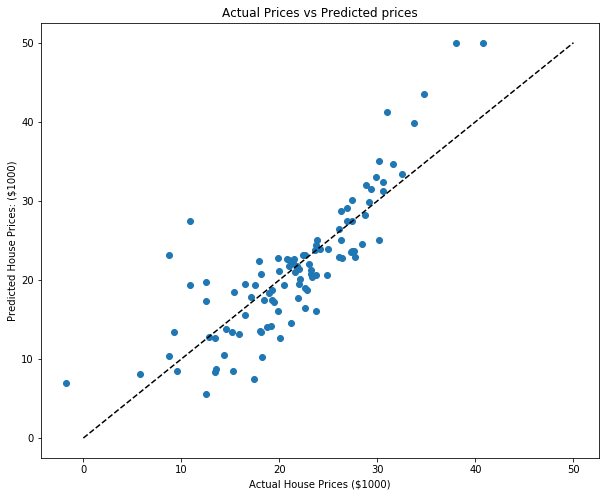

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
lr.fit(X_train, Y_train)
pred = lr.predict(X_test)

plt.figure(figsize=(10,8))
plt.scatter(pred, Y_test)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
plt.title("Actual Prices vs Predicted prices")